**PARTE 2 DO CASE DE DS**

Agora, utilize a API “https://brasilapi.com.br/”, escolha 2 cidades fornecidas pelo endpoint “CPTEC” em “Listar localidades” e forneça a previsão meteorológica para ambas as cidades usando o endpoint “Previsão meteorológica para uma cidade”. Aloque os dados em um dataframe.

Listar localidades
Retorna listagem com todas as cidades junto a seus respectivos códigos presentes nos serviços da CPTEC. O Código destas cidades será utilizado para os serviços de meteorologia e a ondas (previsão oceânica) fornecido pelo centro. Leve em consideração que o WebService do CPTEC as vezes é instável, então se não encontrar uma determinada cidade na listagem completa, tente buscando por parte de seu nome no endpoint de busca.

###IMPORTRANDO BIBLIOTECAS

In [32]:
import requests
import pandas as pd

In [46]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

###MONTANDO O DRIVE CASO QUEIRA SALVAR ALGUM DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###CRIANDO UMA FUNÇÃO QUE BUSCA DADOS ATRAVES DO ENDPOINT

In [3]:
# Função para obter informações sobre a cidade a partir do endpoint
def obter_informacoes_cidade(nome_cidade):
    url = f'https://brasilapi.com.br/api/cptec/v1/cidade/{nome_cidade}' # requisição para dados das cidades
    resposta = requests.get(url)
    dados_cidade = resposta.json()
    return dados_cidade

###DEFININDO AS CIDADES A SEREM BUSCADAS

In [62]:
# Lista de nomes de cidades a buscar
nomes_cidades = ['Miracatu', 'Eldorado']

###CRIANDO UMA LISTA QUE CHAMA A FUNÇÃO obter_informacoes_cidade

In [69]:
# Obtendo as informações sobre as cidades
informacoes_cidades = []

for nome_cidade in nomes_cidades: # Inicia um loop for que percorre cada elemento na lista nomes_cidades. Em cada iteração do loop, nome_cidade assume o valor de um elemento da lista.
    dados_cidade = obter_informacoes_cidade(nome_cidade)
    informacoes_cidades.append(dados_cidade)

###CRIANDO E EXIBINDO UM DF PARA OS DADOS DAS CIDADES

In [70]:
# Criando um DataFrame com as informações
df_cidades = pd.DataFrame(informacoes_cidades)

In [71]:
# Exibindo o DataFrame
print(df_cidades)

                                                  0  \
0  {'nome': 'Miracatu', 'id': 3270, 'estado': 'SP'}   
1  {'nome': 'Eldorado', 'id': 1862, 'estado': 'MS'}   

                                                  1  \
0                                              None   
1  {'nome': 'Eldorado', 'id': 1863, 'estado': 'SP'}   

                                                   2  \
0                                               None   
1  {'nome': 'Eldorado do Sul', 'id': 1864, 'estad...   

                                                   3  
0                                               None  
1  {'nome': 'Eldorado dos Carajás', 'id': 1865, '...  


###CRIANDO UMA FUNÇÃO PARA OBTER INFOS METEOROLÓGICAS DAS CIDADES

In [65]:
# Função para obter a previsão meteorológica para uma cidade a partir do endpoint
def obter_previsao_meteorologica(city_code):
    url = f'https://brasilapi.com.br/api/cptec/v1/clima/previsao/{city_code}' # requisição para dados meteorologicos
    resposta = requests.get(url)
    dados_previsao = resposta.json()
    return dados_previsao

###OBTENDO A PREVISÃO DE ACORDO COM O ID DA CIDADE

In [72]:
id1 = obter_previsao_meteorologica(3270)
id2 = obter_previsao_meteorologica(1863)

In [73]:
# Exibindo os dados da previsão meteorológica para ambas as cidades
print(id1)
print(id2)

{'cidade': 'Miracatu', 'estado': 'SP', 'atualizado_em': '2023-12-08', 'clima': [{'data': '2023-12-08', 'condicao': 'c', 'condicao_desc': 'Chuva', 'min': 23, 'max': 28, 'indice_uv': 13}]}
{'cidade': 'Eldorado', 'estado': 'SP', 'atualizado_em': '2023-12-08', 'clima': [{'data': '2023-12-08', 'condicao': 'pn', 'condicao_desc': 'Parcialmente Nublado', 'min': 23, 'max': 28, 'indice_uv': 13}]}


###CRIANDO UM DF DE ACORDO COM OS DADOS DAS CIDADES E SALVANDO EM CSV

In [85]:
# Função para converter dados em DF
def converter_para_dataframe(dados_cidade):
    df = pd.json_normalize(dados_cidade, 'clima', ['cidade', 'estado', 'atualizado_em'])
    return df

In [86]:
# Convertendo dados para DF
df_id1 = converter_para_dataframe(id1)
df_id2 = converter_para_dataframe(id2)

In [87]:
# Concatenando DFs
df_final = pd.concat([df_id1, df_id2], ignore_index=True)

In [88]:
# Salvando o DF como CSV
df_final.to_csv('dados.csv', index=False)

In [89]:
# Exibindo os dados
df_tratado = (pd.read_csv('dados.csv'))
df_tratado

,data,condicao,condicao_desc,min,max,indice_uv,cidade,estado,atualizado_em
0,2023-12-08,c,Chuva,23,28,13,Miracatu,SP,2023-12-08
1,2023-12-08,pn,Parcialmente Nublado,23,28,13,Eldorado,SP,2023-12-08


###EXPLORANDO OS DADOS

In [79]:
# Verificando o tipo dos dados após conversão
df_tratado.dtypes

data             object
condicao         object
condicao_desc    object
min               int64
max               int64
indice_uv         int64
cidade           object
estado           object
atualizado_em    object
dtype: object

In [90]:
# Explorando dados categoricos
agrupado = df_tratado.groupby(['condicao_desc']).size()
agrupado

condicao_desc
Chuva                   1
Parcialmente Nublado    1
dtype: int64

<Axes: xlabel='condicao_desc'>

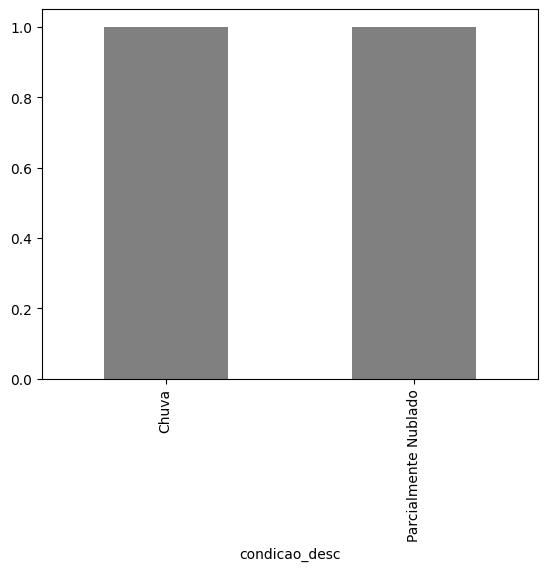

In [91]:
agrupado.plot.bar(color = 'gray')

In [92]:
# explorando colunas numéricas
#temperatura min
df_tratado['min'].describe()

count     2.0
mean     23.0
std       0.0
min      23.0
25%      23.0
50%      23.0
75%      23.0
max      23.0
Name: min, dtype: float64

In [93]:
# explorando colunas numéricas
#temperatura max
df_tratado['max'].describe()

count     2.0
mean     28.0
std       0.0
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: max, dtype: float64